In [2]:
# Importing all necessary modules
import numpy as np
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


In [9]:
# Set seed for reproducibility
np.random.seed(5)

# Read the poem data 
poems_df = pd.read_csv('poem_cleaned.csv')

print("Number of poems loaded: %s " % (len(poems_df)))

# Display the data
poems_df.head()

Number of poems loaded: 508 


,Unnamed: 0,author,content,poem name,age,type,ori_content
0,1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore,"Sir Charles into my chamber coming in,\nWhen I..."
1,2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\nAn...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,"Our vice runs beyond all that old men saw,\nAn..."
2,3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\nA...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,"Lo I the man, whose Muse whilome did maske,\nA..."
3,8,JOHN DONNE,"When by thy scorn, O murd'ress, I am dead\n ...",The Apparition,Renaissance,Mythology & Folklore,"When by thy scorn, O murd'ress, I am dead\n ..."
4,9,JOHN SKELTON,"Pla ce bo,\nWho is there, who?\nDi le xi,\nDam...",The Book of Phillip Sparrow,Renaissance,Mythology & Folklore,"Pla ce bo,\nWho is there, who?\nDi le xi,\nDam..."


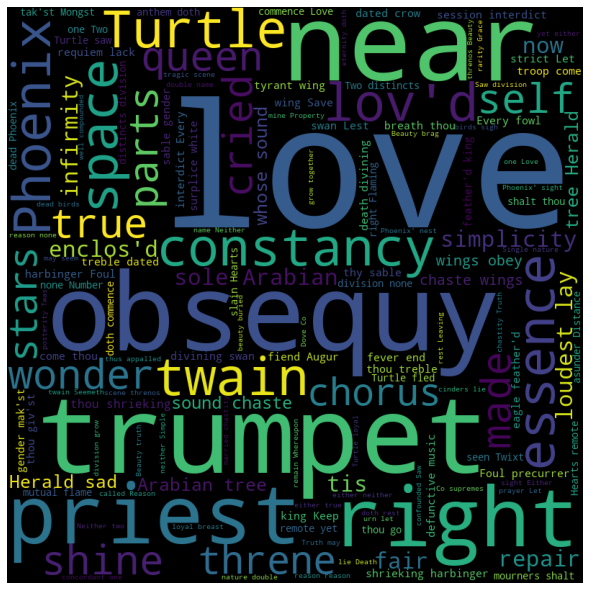

In [4]:
# setting stopwords
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in poems_df.clean_content:  
  
    # split the value 
    tokens = val.split() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [10]:
#converting to string
poems_df['content'] = poems_df['content'].astype(str)

In [11]:
text = poems_df['content'].to_string()

In [12]:
#transform to lower case

poems_df['content'] = poems_df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
poems_df['content'].head(5)

0    sir charles into my chamber coming in, when i ...
1    our vice runs beyond all that old men saw, and...
2    lo i the man, whose muse whilome did maske, as...
3    when by thy scorn, o murd'ress, i am dead and ...
4    pla ce bo, who is there, who? di le xi, dame m...
Name: content, dtype: object

In [13]:
# removing punctuation
poems_df['content'] = poems_df['content'].str.replace('[^\w\s]','')
poems_df['content'].head()

0    sir charles into my chamber coming in when i w...
1    our vice runs beyond all that old men saw and ...
2    lo i the man whose muse whilome did maske as t...
3    when by thy scorn o murdress i am dead and tha...
4    pla ce bo who is there who di le xi dame marge...
Name: content, dtype: object

In [14]:
#removing common words
freq = pd.Series(' '.join(poems_df['content']).split()).value_counts()[:10]
freq

the     3689
and     3081
of      1891
to      1694
in      1365
that    1259
i       1252
a       1237
my       983
with     880
dtype: int64

In [15]:
#removing rare words
freq1 = pd.Series(' '.join(poems_df['content']).split()).value_counts()[-10:]
freq1

theban           1
everfixed        1
incensd          1
mattins          1
earne            1
disgust          1
inviolability    1
honeybee         1
wakdst           1
ardour           1
dtype: int64

In [18]:
#spelling correction
from textblob import TextBlob
poems_df['content']=poems_df['content'].apply(lambda x: str(TextBlob(x).correct()))


In [17]:
print(poems_df['content'])

0      sir charles into my chamber coming in when i w...
1      our vice runs beyond all that old men saw and ...
2      lo i the man whose muse while did make as time...
3      when by thy scorn o undress i am dead and that...
4      plan ce to who is there who di le xi dame arte...
                             ...                        
503    with the man i love who loves me not i walked ...
504    hart crane voyages i ii iii iv v vi from the c...
505    when you are old and grey and full of sleep an...
506    give me hunger o you gods that sit and give th...
507    potuia potuia white grave goddess pity my sadn...
Name: content, Length: 508, dtype: object


In [19]:
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [21]:
for n in range(507):
    poems_df['content'].iloc[n]= remove_special_characters(poems_df['content'].iloc[n], remove_digits=True)
print(poems_df['content'].head(15))

0     sir charles into my chamber coming in when i w...
1     our vice runs beyond all that old men saw and ...
2     lo i the man whose muse while did make as time...
3     when by thy scorn o undress i am dead and that...
4     plan ce to who is there who di le xi dame arte...
5     ye learned sisters which have oftentimes been ...
6     by that he ended had his ghostly sermon the fo...
7     the welcome sun from sea freak is returned and...
8     i met a courtier riding on the plain wellmount...
9     walking the fields a wantcatcher i speed to hi...
10    fishing if i a fishes may protest of pleasures...
11    january glogau prima argument in this first gl...
12    where the bee sucks there suck i in a cowslips...
13    as i in hoar winters night stood shivering in ...
14    care for thy soul as thing of greatest price m...
Name: content, dtype: object


In [22]:
print(poems_df['content'])

0      sir charles into my chamber coming in when i w...
1      our vice runs beyond all that old men saw and ...
2      lo i the man whose muse while did make as time...
3      when by thy scorn o undress i am dead and that...
4      plan ce to who is there who di le xi dame arte...
                             ...                        
503    with the man i love who loves me not i walked ...
504    hart crane voyages i ii iii iv v vi from the c...
505    when you are old and grey and full of sleep an...
506    give me hunger o you gods that sit and give th...
507    potuia potuia white grave goddess pity my sadn...
Name: content, Length: 508, dtype: object


In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


poems_df['stopwords'] = poems_df['content'].apply(lambda x: len([x for x in x.split() if x in stop]))
poems_df[['content','stopwords']].head()

,content,stopwords
0,sir charles into my chamber coming in when i w...,52
1,our vice runs beyond all that old men saw and ...,24
2,lo i the man whose muse while did make as time...,1909
3,when by thy scorn o undress i am dead and that...,58
4,plan ce to who is there who di le xi dame arte...,334


In [24]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
#stopword_list.remove('no')
#stopword_list.remove('not')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [26]:
for n in range(507):
    poems_df['content'].iloc[n]= remove_stopwords(poems_df['content'].iloc[n], is_lower_case=False)
print(poems_df['content'].head(15))

0     sir charles chamber coming writing fairy queen...
1     vice runs beyond old men saw far authentically...
2     lo man whose muse make time taught lowly sheph...
3     thy scorn undress dead thou thinks thee free s...
4     plan ce di le xi dame artery wherefore sole ph...
5     ye learned sisters oftentimes adding others ad...
6     ended ghostly sermon fox well induced parson p...
7     welcome sun sea freak returned cheered beams n...
8     met courtier riding plain wellmounted brave ga...
9     walking fields wantcatcher speed went desirous...
10    fishing fishes may protest pleasures sweetest ...
11    january glogau prima argument first glove coin...
12    bee sucks suck cowslips bell lie couch owns cr...
13    hoar winters night stood shivering snow surpri...
14    care thy soul thing greatest price made end ta...
Name: content, dtype: object


In [27]:
poems_df['stopwords'] = poems_df['content'].apply(lambda x: len([x for x in x.split() if x in stop]))
poems_df[['content','stopwords']].head()

,content,stopwords
0,sir charles chamber coming writing fairy queen...,0
1,vice runs beyond old men saw far authentically...,0
2,lo man whose muse make time taught lowly sheph...,0
3,thy scorn undress dead thou thinks thee free s...,0
4,plan ce di le xi dame artery wherefore sole ph...,0


In [37]:
from nltk.stem import WordNetLemmatizer
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

poems_df['con'] = get_lemmatized_text(poems_df['content'])

poems_df['con'].head()

0    sir charles chamber coming writing fairy queen...
1    vice run beyond old men saw far authentically ...
2    lo man whose muse make time taught lowly sheph...
3    thy scorn undress dead thou think thee free so...
4    plan ce di le xi dame artery wherefore sole ph...
Name: con, dtype: object

In [38]:
poems_df.head(15)

,Unnamed: 0,author,content,poem name,age,type,ori_content,stopwords,cont,con
0,1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,sir charles chamber coming writing fairy queen...,An Epilogue to the Above,Renaissance,Mythology & Folklore,"Sir Charles into my chamber coming in,\nWhen I...",0,sir charles chamber coming writing fairy queen...,sir charles chamber coming writing fairy queen...
1,2,THOMAS BASTARD,vice runs beyond old men saw far authentically...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore,"Our vice runs beyond all that old men saw,\nAn...",0,vice run beyond old men saw far authentically ...,vice run beyond old men saw far authentically ...
2,3,EDMUND SPENSER,lo man whose muse make time taught lowly sheph...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,"Lo I the man, whose Muse whilome did maske,\nA...",0,lo man whose muse make time taught lowly sheph...,lo man whose muse make time taught lowly sheph...
3,8,JOHN DONNE,thy scorn undress dead thou thinks thee free s...,The Apparition,Renaissance,Mythology & Folklore,"When by thy scorn, O murd'ress, I am dead\n ...",0,thy scorn undress dead thou think thee free so...,thy scorn undress dead thou think thee free so...
4,9,JOHN SKELTON,plan ce di le xi dame artery wherefore sole ph...,The Book of Phillip Sparrow,Renaissance,Mythology & Folklore,"Pla ce bo,\nWho is there, who?\nDi le xi,\nDam...",0,plan ce di le xi dame artery wherefore sole ph...,plan ce di le xi dame artery wherefore sole ph...
5,10,EDMUND SPENSER,ye learned sisters oftentimes adding others ad...,Epithalamion,Renaissance,Mythology & Folklore,Ye learned sisters which have oftentimes\nBeen...,0,ye learned sister oftentimes adding others ado...,ye learned sister oftentimes adding others ado...
6,12,EDMUND SPENSER,ended ghostly sermon fox well induced parson p...,Prosopopoia: or Mother Hubbard's Tale,Renaissance,Mythology & Folklore,"By that he ended had his ghostly sermon,\nThe ...",0,ended ghostly sermon fox well induced parson p...,ended ghostly sermon fox well induced parson p...
7,20,THOMAS BASTARD,welcome sun sea freak returned cheered beams n...,"Book 1, Epigram 34: Ad. Thomam Freake armig. d...",Renaissance,Nature,"The welcome Sun from sea Freake is returned,\n...",0,welcome sun sea freak returned cheered beam na...,welcome sun sea freak returned cheered beam na...
8,21,THOMAS BASTARD,met courtier riding plain wellmounted brave ga...,"Book 2, Epigram 22",Renaissance,Nature,"I met a courtier riding on the plain,\nWell-mo...",0,met courtier riding plain wellmounted brave ga...,met courtier riding plain wellmounted brave ga...
9,22,THOMAS BASTARD,walking fields wantcatcher speed went desirous...,"Book 2, Epigram 8",Renaissance,Nature,"Walking the fields a wantcatcher I spied,\nTo ...",0,walking field wantcatcher speed went desirous ...,walking field wantcatcher speed went desirous ...


In [39]:
poems_df.to_csv('preprocessed.csv')